<h1> Análise Exploratória

## Instalação e importação das bibliotecas necessárias

In [34]:
%pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   ---------- ---------------------------- 81.9/294.9 kB 770.8 kB/s eta 0:00:01
   ---------------------- ----------------- 163.8/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

### 📌 Etapa 1: Análise Inicial do Dataset Estruturado

Após a extração e exportação dos dados de perfis do LinkedIn para o arquivo `perfil_linkedin_dados.csv`, esta etapa tem como objetivo realizar uma análise exploratória inicial do conteúdo para verificar sua integridade e estrutura.

#### 🔍 Ações realizadas:

1. **Leitura do Arquivo CSV**
   - O dataset estruturado é carregado utilizando `pandas.read_csv()` a partir do diretório `../processed/`.

2. **Visualização das Primeiras Linhas**
   - A função `head()` exibe as 5 primeiras linhas do DataFrame, permitindo uma inspeção rápida dos dados extraídos.

3. **Verificação de Dimensões**
   - A propriedade `shape` mostra o número total de linhas (registros) e colunas (atributos) do dataset.

4. **Tipos de Dados**
   - Com `dtypes`, é possível verificar o tipo de dado presente em cada coluna, útil para identificar possíveis inconsistências ou a necessidade de conversões.

5. **Análise de Valores Nulos**
   - A combinação `isnull().sum()` identifica a quantidade de valores ausentes por coluna, passo fundamental para o planejamento de tratamentos posteriores.


In [19]:
df_linkedin_profile_data = pd.read_csv("../processed/perfil_linkedin_dados.csv")
df_linkedin_profile_data.head()

,name,headline,experience,education
0,Ana Beatriz De Souza Maciel,Aluno na Escola Superior de Tecnologia-UEA,Samsung Ocean - Samsung Ocean (- Fui responsáv...,Universidade do Estado do Amazonas - UEA - Uni...
1,Álef Monteiro,Angular | React | Django | Docker | PostgreSQL...,Full Stack Developer - Full Stack Developer (A...,Universidade do Estado do Amazonas - UEA - Uni...
2,Janderson Chaves C. Meireles,Software Developer | Electrical Engineering | ...,Sidia Instituto de Ciência e Tecnologia - Sidi...,Universidade do Estado do Amazonas - UEA - Uni...
3,Janderson Lira,Software Developer | Python | Machine Learning...,Top skills - Top skills (Python • Processament...,FGV - Fundação Getulio Vargas - FGV - Fundação...
4,Janielson Moura,Desenvolvedor Fullstack,"Venturus - Venturus (Análise de problemas, Exp...",Centro Universitário Fametro - Centro Universi...


In [35]:
print("Shape:", df_linkedin_profile_data.shape)
print("\nTipos de Dados:\n", df_linkedin_profile_data.dtypes)
print("\nValores Nulos:\n", df_linkedin_profile_data.isnull().sum())

Shape: (557, 4)

Tipos de Dados:
 name          object
headline      object
experience    object
education     object
dtype: object

Valores Nulos:
 name            0
headline       12
experience    265
education     263
dtype: int64


### 📌 Etapa 3: Limpeza de Texto e Visualização com WordCloud

Com os dados já estruturados e carregados, esta etapa tem como foco o **pré-processamento textual** e a **visualização das palavras mais frequentes** nas principais colunas textuais do dataset.

#### 🔍 Ações realizadas:

**Limpeza de Texto**
   - As colunas `headline`, `experience` e `education` são:
     - Preenchidas com string vazia (`""`) onde houver valores nulos (`NaN`);
     - Convertidas para minúsculas;
     - Removidos os espaços extras nas extremidades com `.strip()`.



In [ ]:
for col in ["headline", "experience", "education"]:
    df_linkedin_profile_data[col] = df_linkedin_profile_data[col].fillna("").apply(lambda x: x.strip().lower())

In [39]:
def plot_wordcloud(text_series, title):
    text = " ".join(text_series)
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()


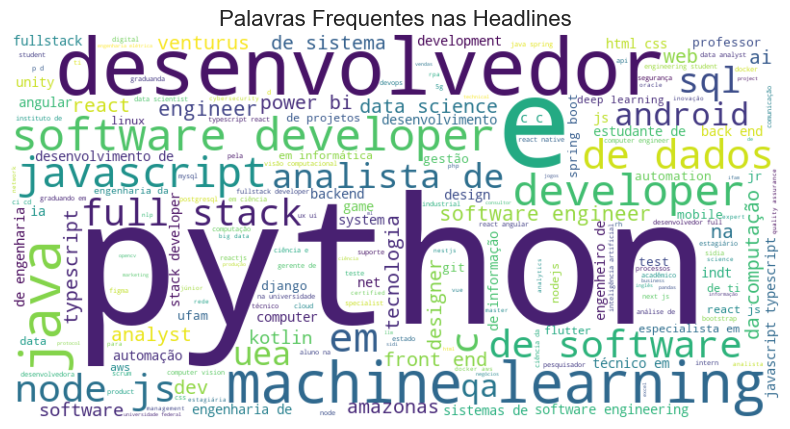

In [40]:
plot_wordcloud(df_linkedin_profile_data["headline"], "Palavras Frequentes nas Headlines")

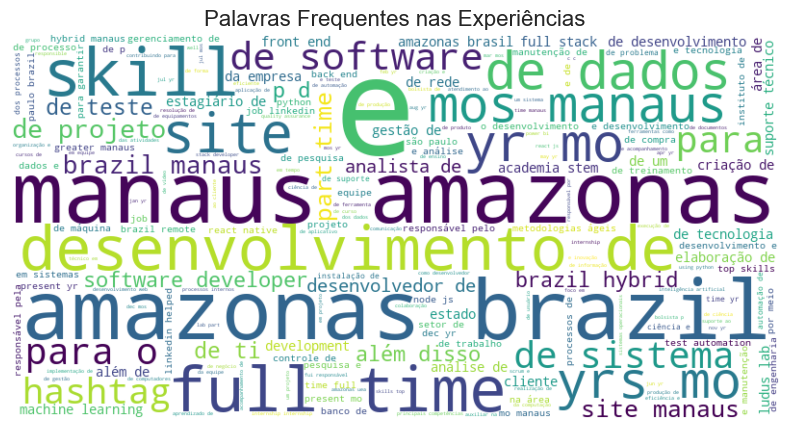

In [41]:
plot_wordcloud(df_linkedin_profile_data["experience"], "Palavras Frequentes nas Experiências")

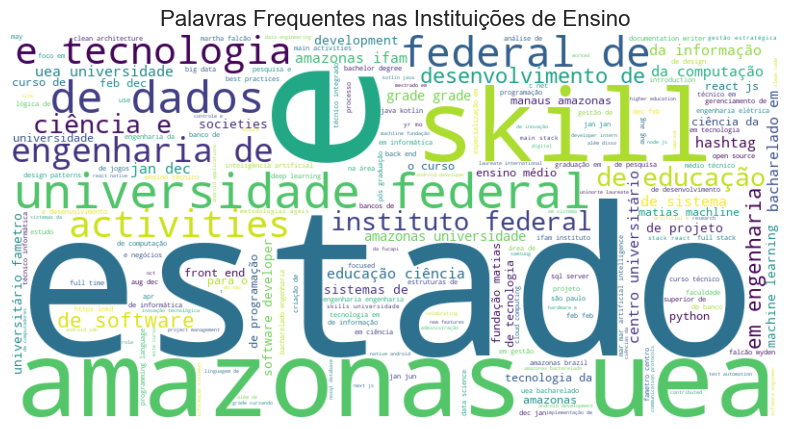

In [42]:
plot_wordcloud(df_linkedin_profile_data["education"], "Palavras Frequentes nas Instituições de Ensino")

### 📌 Etapa 4: Análise de Instituições, Skills Técnicas e Tempo de Experiência

Esta etapa tem como foco a **análise qualitativa** das formações acadêmicas e experiências profissionais dos perfis, com destaque para instituições de ensino, habilidades técnicas (skills) e tempo médio de experiência associado a cada skill.

#### 🔍 Ações realizadas:

1. **Extração da Instituição de Ensino**
   - A partir da coluna `education`, a instituição é extraída separando o texto pelo caractere `-`.
   - Registros com instituição vazia são filtrados.
   - As 10 instituições mais frequentes são exibidas em um gráfico de barras.

2. **Identificação de Skills Técnicas**
   - Define-se uma lista de palavras-chave relevantes (ex: `python`, `react`, `sql`, `docker`, etc.).
   - Para cada perfil, as colunas `headline` e `experience` são combinadas e analisadas para extrair as skills presentes.
   - A coluna `skills` armazena as tecnologias encontradas em forma de lista.
   - O DataFrame é "explodido" para contar a frequência de cada skill, exibida em gráfico de barras.

3. **Extração do Tempo de Experiência**
   - Utiliza-se regex para capturar padrões como `X yr` e `Y mo` na descrição de experiência.
   - O tempo total é convertido em meses e salvo na coluna `tempo_meses`.

4. **Tempo Médio de Experiência por Skill**
   - O DataFrame é explodido novamente, associando cada skill ao tempo de experiência total do perfil.
   - Calcula-se a média de meses por skill com `groupby()` e `mean()`.
   - As 15 habilidades com maior tempo médio de experiência são visualizadas em gráfico de barras.


C:\Users\ronal\AppData\Local\Temp\ipykernel_23908\1793133098.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=instituicoes_freq.values, y=instituicoes_freq.index, palette="Greens_d")


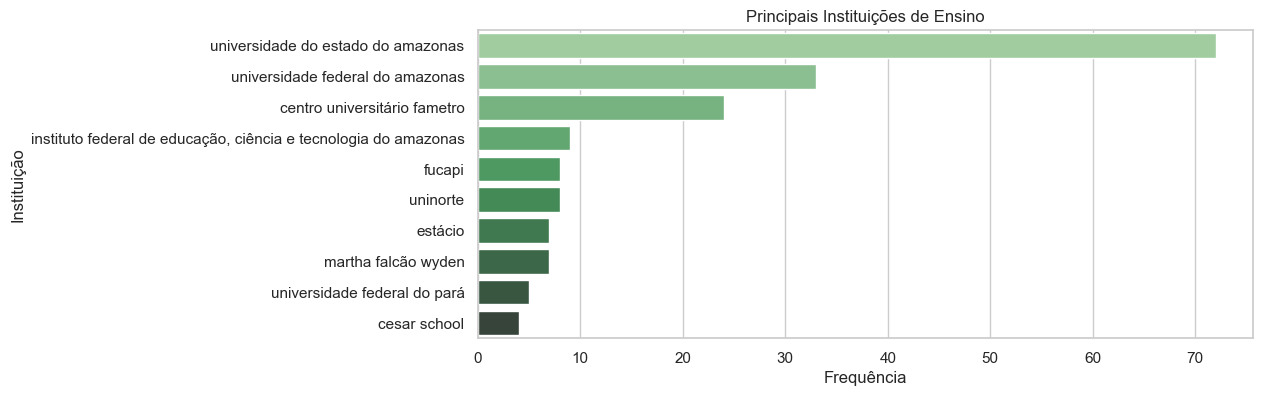

In [ ]:
df_linkedin_profile_data["instituicao"] = df_linkedin_profile_data["education"].apply(
    lambda x: x.split("-")[0].strip()
)

instituicoes_validas = df_linkedin_profile_data[
    df_linkedin_profile_data["instituicao"].str.strip() != ""
]

instituicoes_freq = instituicoes_validas["instituicao"].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=instituicoes_freq.values, y=instituicoes_freq.index, palette="Greens_d")
plt.title("Principais Instituições de Ensino")
plt.xlabel("Frequência")
plt.ylabel("Instituição")
plt.show()


C:\Users\ronal\AppData\Local\Temp\ipykernel_23908\3807460586.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skills_series.values, y=skills_series.index, palette="magma")


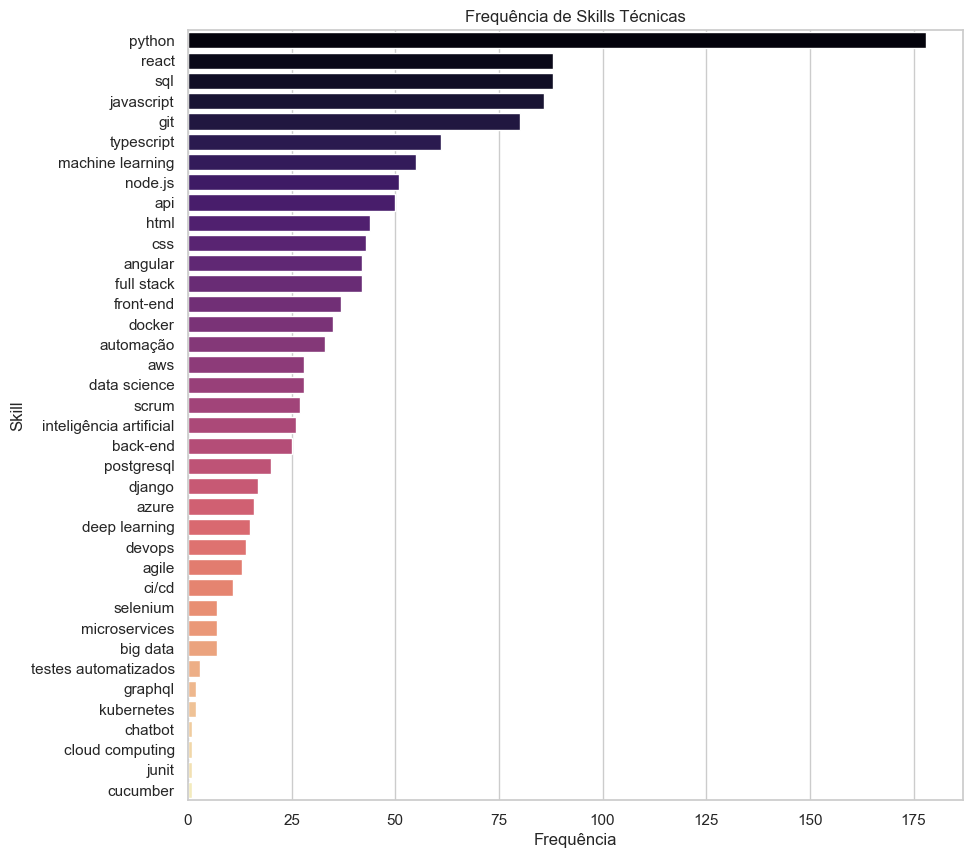

In [ ]:
palavras_chave = ["python", "react", "angular", "docker", "django", "sql", "postgresql", "machine learning", "back-end", "front-end", "full stack", "javascript", "typescript", "node.js", "api", "graphql", "html", "css", "deep learning", "data science", "big data", "cloud computing", "aws", "azure", "devops", "kubernetes", "microservices", "LLM", "chatbot", "inteligência artificial", "automação", "scrum", "agile", "git", "ci/cd", "testes automatizados", "selenium", "junit", "cucumber"]

def extrair_skills(texto):
    return [skill for skill in palavras_chave if skill in texto]

df_linkedin_profile_data["skills"] = df_linkedin_profile_data["headline"] + " " + df_linkedin_profile_data["experience"]
df_linkedin_profile_data["skills"] = df_linkedin_profile_data["skills"].apply(extrair_skills)

skills_series = df_linkedin_profile_data.explode("skills")["skills"].value_counts()

plt.figure(figsize=(10, 10))
sns.barplot(x=skills_series.values, y=skills_series.index, palette="magma")
plt.title("Frequência de Skills Técnicas")
plt.xlabel("Frequência")
plt.ylabel("Skill")
plt.show()


C:\Users\ronal\AppData\Local\Temp\ipykernel_23908\358407465.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=media_tempo_por_skill.head(15).values, y=media_tempo_por_skill.head(15).index, palette="viridis")


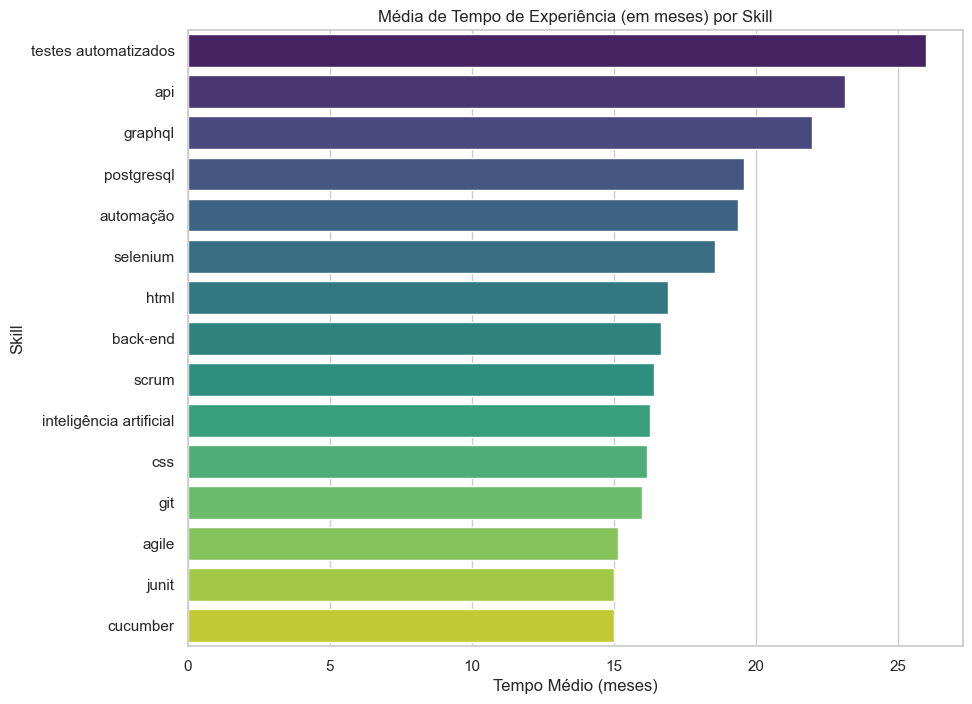

In [59]:
def extrair_tempo_em_meses(texto):
    texto = texto.lower()
    anos = re.search(r'(\d+)\s*yr', texto)
    meses = re.search(r'(\d+)\s*mo', texto)

    total_meses = 0
    if anos:
        total_meses += int(anos.group(1)) * 12
    if meses:
        total_meses += int(meses.group(1))
    return total_meses

df_linkedin_profile_data["tempo_meses"] = df_linkedin_profile_data["experience"].apply(extrair_tempo_em_meses)

palavras_chave = ["python", "react", "angular", "docker", "django", "sql", "postgresql", "machine learning", "back-end", "front-end", "full stack", "javascript", "typescript", "node.js", "api", "graphql", "html", "css", "deep learning", "data science", "big data", "cloud computing", "aws", "azure", "devops", "kubernetes", "microservices", "LLM", "inteligência artificial", "automação", "scrum", "agile", "git", "ci/cd", "testes automatizados", "selenium", "junit", "cucumber"]

def extrair_skills(texto):
    texto = texto.lower()
    return [skill for skill in palavras_chave if skill in texto]

df_linkedin_profile_data["skills"] = (df_linkedin_profile_data["headline"] + " " + df_linkedin_profile_data["experience"]).apply(extrair_skills)

df_skills_tempo = df_linkedin_profile_data.explode("skills")[["skills", "tempo_meses"]]

df_skills_tempo = df_skills_tempo.dropna(subset=["skills"])

media_tempo_por_skill = df_skills_tempo.groupby("skills")["tempo_meses"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=media_tempo_por_skill.head(15).values, y=media_tempo_por_skill.head(15).index, palette="viridis")
plt.title("Média de Tempo de Experiência (em meses) por Skill")
plt.xlabel("Tempo Médio (meses)")
plt.ylabel("Skill")
plt.show()


C:\Users\ronal\AppData\Local\Temp\ipykernel_23908\4101985875.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=empresas_freq.values, y=empresas_freq.index, palette="Blues_d")


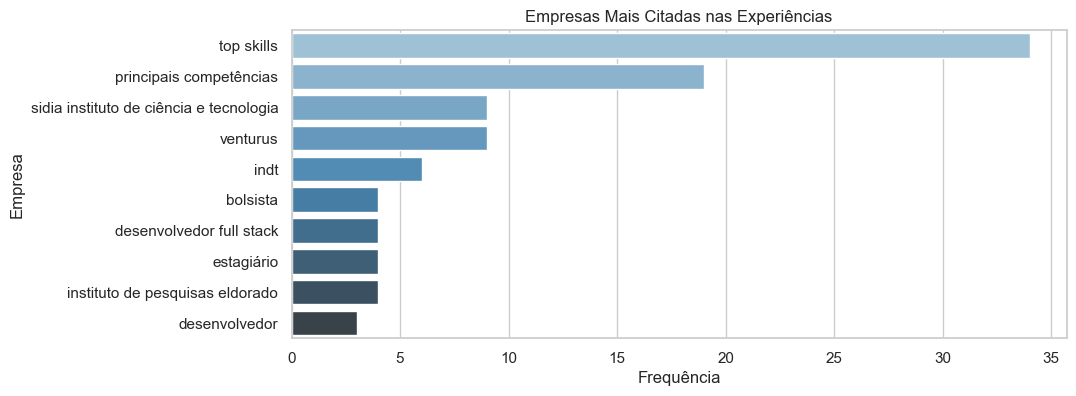

In [56]:
# Extrair empresa apenas se houver '-'
df_linkedin_profile_data["empresa"] = df_linkedin_profile_data["experience"].apply(
    lambda x: x.split("-")[0].strip() if "-" in x else ""
)

# Filtrar para remover empresas vazias
empresas_validas = df_linkedin_profile_data[df_linkedin_profile_data["empresa"] != ""]

# Contar as mais frequentes
empresas_freq = empresas_validas["empresa"].value_counts().head(10)

# Plotar
plt.figure(figsize=(10, 4))
sns.barplot(x=empresas_freq.values, y=empresas_freq.index, palette="Blues_d")
plt.title("Empresas Mais Citadas nas Experiências")
plt.xlabel("Frequência")
plt.ylabel("Empresa")
plt.show()

C:\Users\ronal\AppData\Local\Temp\ipykernel_23908\172659401.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=area_freq.values, y=area_freq.index, palette="cool")


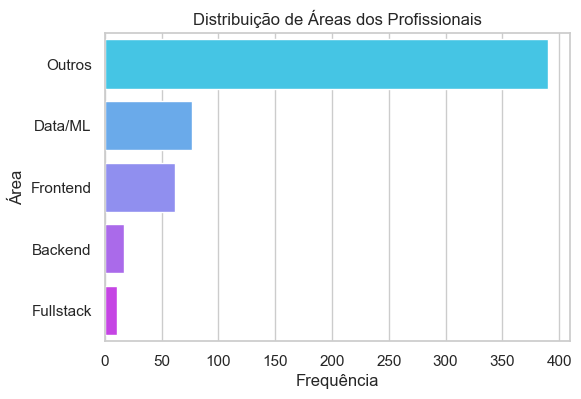

In [52]:
def categorizar_area(texto):
    texto = texto.lower()
    if "data" in texto or "machine learning" in texto:
        return "Data/ML"
    elif "frontend" in texto or "react" in texto:
        return "Frontend"
    elif "backend" in texto or "django" in texto:
        return "Backend"
    elif "fullstack" in texto:
        return "Fullstack"
    else:
        return "Outros"

df_linkedin_profile_data["area"] = df_linkedin_profile_data["headline"].apply(categorizar_area)

area_freq = df_linkedin_profile_data["area"].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=area_freq.values, y=area_freq.index, palette="cool")
plt.title("Distribuição de Áreas dos Profissionais")
plt.xlabel("Frequência")
plt.ylabel("Área")
plt.show()

### 📌 Etapa 5: Filtragem de Perfis com Base em Requisitos da Vaga

Esta etapa realiza um filtro simples para identificar perfis que atendem a critérios educacionais e técnicos definidos na descrição de uma vaga específica.

#### 🔍 Ações realizadas:

1. **Definição de Palavras-Chave da Vaga**
   - Listas de palavras-chave relacionadas à formação acadêmica (`keywords_edu`) e às habilidades técnicas (`keywords_skills`) são definidas com base na descrição da vaga.

2. **Filtro por Formação Acadêmica**
   - Função `contem_keyword_edu` verifica se o texto da coluna `education` contém alguma das palavras-chave educacionais.
   - O DataFrame é filtrado para manter apenas os perfis que possuem uma formação compatível.

3. **Criação da Coluna `skills`**
   - Combina as colunas `headline` e `experience` para consolidar todas as informações técnicas do perfil em uma única string.

4. **Filtro por Skills Técnicas**
   - Função `contem_keyword_skill` verifica se a coluna combinada `skills` contém alguma das palavras-chave técnicas da vaga.
   - O DataFrame é novamente filtrado para manter apenas os perfis que possuem as habilidades desejadas.

5. **Resultado Final**
   - O DataFrame resultante contém apenas as colunas relevantes: `name`, `experience`, `education` e `skills`.
   - O índice é resetado para organização.



1. **Vaga 1**

- Formação superior em Ciência da Computação, Sistemas de informação, Engenharia da Computação/Elétrica ou similar;
- Experiência com NodeJS, Express, APIs REST e BDD;
- Experiência com Jest para testes unitários e de integração;
- Experiência com controle de versão usando Git;
- Experiência com banco de dados relacional e não relacional;
- Experiência com Javascript, CSS, HTML e Angular;
- Inglês avançado para conversação, escrita e leitura;
- Diferenciais: Experiência com AWS e GCP, conhecimentos em IA/prompt engineering e experiência com DevOps.

In [61]:
keywords_edu = ["ciencia da computacao", "sistemas de informacao", "engenharia da computacao", "engenharia elétrica"]
keywords_skills = ["nodejs", "express", "api", "bdd", "jest", "git", "sql", "nosql", "javascript", "css", "html", "angular", "aws", "devops", "gcp"]

In [65]:
def contem_keyword_edu(texto):
    texto = texto.lower()
    return any(kw in texto for kw in keywords_edu)

df_filtrado_edu = df_linkedin_profile_data[df_linkedin_profile_data["education"].apply(contem_keyword_edu)]

def contem_keyword_skill(texto):
    texto = texto.lower()
    return any(kw in texto for kw in keywords_skills)

df_filtrado_edu.loc[:, "skills"] = df_filtrado_edu["headline"] + " " + df_filtrado_edu["experience"]

df_resultado = df_filtrado_edu[df_filtrado_edu["skills"].apply(contem_keyword_skill)]

df_resultado = df_resultado[["name", "experience", "education", "skills"]]

df_resultado.reset_index(drop=True, inplace=True)
df_resultado

,name,experience,education,skills
0,Janderson Chaves C. Meireles,sidia instituto de ciência e tecnologia - sidi...,universidade do estado do amazonas - uea - uni...,software developer | electrical engineering | ...
1,Leila Caroline,software quality assurance intern - software q...,universidade federal do amazonas - universidad...,software quality assurance intern at venturus ...
2,Carlos Lavor Neto,back-end developer - back-end developer (amazo...,universidade do estado do amazonas - uea - uni...,software developer @ tribunal de justiça do es...
3,Gabriel Bento,desenvolvedor android - desenvolvedor android ...,universidade federal do amazonas - universidad...,desenvolvedor android | kotlin | jetpack compo...
4,Iran Junior,sidia instituto de ciência e tecnologia - sidi...,federal university of ceara - federal universi...,r&d engineer | software developer | 5g and lte...
5,Deyse Beatriz F.,bolsista - bolsista (esse sistema representa u...,centro universitário fametro - centro universi...,html • css • python • c | sistemas de informa...


2. **Vaga 2**
- Ensino superior completo em Engenharia/Ciência da Computação, Engenharia Elétrica, Sistemas de Informação ou similar;
- Experiência em gerenciamento de projetos de Software, desde a elaboração, desenvolvimento (com controle de escopo, prazos e qualidade) e finalização dos mesmos;
- Experiência em gestão de projetos de Data Science e IA, desejável ter participado de ciclos de projeto nessa área;
- Experiência com Gestão de pessoas;
- Experiência na condução de projetos desenvolvidos sob metodologia ágeis;
- Inglês avançado/fluente para conversação, escrita e leitura.

In [76]:
keywords_edu = ["ciencia da computacao", "sistemas de informacao", "engenharia da computacao", "engenharia elétrica"]
keywords_skills = ["agile", "data science", "machine learning"]

In [77]:
def contem_keyword_edu(texto):
    texto = texto.lower()
    return any(kw in texto for kw in keywords_edu)

df_filtrado_edu = df_linkedin_profile_data[df_linkedin_profile_data["education"].apply(contem_keyword_edu)]

def contem_keyword_skill(texto):
    texto = texto.lower()
    return any(kw in texto for kw in keywords_skills)

df_filtrado_edu.loc[:, "skills"] = df_filtrado_edu["headline"] + " " + df_filtrado_edu["experience"]

df_resultado = df_filtrado_edu[df_filtrado_edu["skills"].apply(contem_keyword_skill)]

df_resultado = df_resultado[["name", "experience", "education", "skills"]]

df_resultado.reset_index(drop=True, inplace=True)
df_resultado

,name,experience,education,skills
0,Iran Junior,sidia instituto de ciência e tecnologia - sidi...,federal university of ceara - federal universi...,r&d engineer | software developer | 5g and lte...
1,Deyse Beatriz F.,bolsista - bolsista (esse sistema representa u...,centro universitário fametro - centro universi...,html • css • python • c | sistemas de informa...


3. **Vaga 3**

- Graduação em Ciência da computação; Engenharia de Software, Sistemas de Informação ou afins;
- Experiência com Android;
- Experiência com Kotlin;

In [73]:
keywords_edu = ["ciencia da computacao", "sistemas de informacao", "engenharia da computacao", "engenharia elétrica"]
keywords_skills = ["android", "kotlin"]

In [74]:
def contem_keyword_edu(texto):
    texto = texto.lower()
    return any(kw in texto for kw in keywords_edu)

df_filtrado_edu = df_linkedin_profile_data[df_linkedin_profile_data["education"].apply(contem_keyword_edu)]

def contem_keyword_skill(texto):
    texto = texto.lower()
    return any(kw in texto for kw in keywords_skills)

df_filtrado_edu.loc[:, "skills"] = df_filtrado_edu["headline"] + " " + df_filtrado_edu["experience"]

df_resultado = df_filtrado_edu[df_filtrado_edu["skills"].apply(contem_keyword_skill)]

df_resultado = df_resultado[["name", "experience", "education", "skills"]]

df_resultado.reset_index(drop=True, inplace=True)
df_resultado

,name,experience,education,skills
0,Gabriel Bento,desenvolvedor android - desenvolvedor android ...,universidade federal do amazonas - universidad...,desenvolvedor android | kotlin | jetpack compo...
